In [1]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 74.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn import linear_model
import statsmodels.formula.api as smf

In [3]:
%ls datasets/

adult.csv                  census.csv     nhanes_2015_2016.csv
airline_data.csv           cwurData.csv   pokemon.csv
antropometria00.csv        data.csv       sample_pivot.csv
antropometria-dataset.csv  headbrain.csv  tips.csv
Canada.xlsx                mic.xlsx       weight-height.csv
Cartwheeldata.csv          movies.csv


In [4]:
df = pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## var interes

In [7]:
vars = ['SMQ020', 'RIAGENDR', 'RIDAGEYR','BPXDI2', 'BMXWT', 'BMXHT']
df = df[vars].dropna()
df

,SMQ020,RIAGENDR,RIDAGEYR,BPXDI2,BMXWT,BMXHT
0,1,1,62,64.0,94.8,184.5
1,1,1,53,88.0,90.4,171.4
2,1,1,78,44.0,83.4,170.1
3,2,2,56,68.0,109.8,160.9
4,2,2,42,54.0,55.2,164.9
...,...,...,...,...,...,...
5730,1,2,76,46.0,59.1,165.8
5731,2,1,26,76.0,112.1,182.2
5732,1,2,80,58.0,71.7,152.2
5733,1,1,35,66.0,78.2,173.3


### correlacion 

In [8]:
df[vars].corr()

,SMQ020,RIAGENDR,RIDAGEYR,BPXDI2,BMXWT,BMXHT
SMQ020,1.000000,0.177262,-0.141680,-0.018135,-0.095775,-0.165333
RIAGENDR,0.177262,1.000000,-0.008891,-0.083048,-0.237218,-0.668219
RIDAGEYR,-0.141680,-0.008891,1.000000,-0.050432,-0.009772,-0.146821
BPXDI2,-0.018135,-0.083048,-0.050432,1.000000,0.141761,0.114946
BMXWT,-0.095775,-0.237218,-0.009772,0.141761,1.000000,0.435384
BMXHT,-0.165333,-0.668219,-0.146821,0.114946,0.435384,1.000000


### regresion lineal 

In [16]:
model = sm.OLS.from_formula('BPXDI2~RIDAGEYR + BPXDI2 + BMXWT',data=df) #BPXDI2 = b0 + b1 * RIDAGEYR + b2 * BPXDI2 + b3 * BMXWT
result = model.fit()
result.summary()

## arriba de .7 se acepta 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXDI2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.635e+32
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:36:26   Log-Likelihood:             1.6214e+05
No. Observations:                5478   AIC:                        -3.243e+05
Df Residuals:                    5474   BIC:                        -3.242e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.749e-15   3.16e-15      0.554      0.580   -4.44e-15    7.94e-15
RIDAGEYR     1.24e-16   2.49e-17      4.980      0.000    7.52e-17    1.73e-16
BPXDI2         1.0000    3.6e-17   2.78e+16      0.000       1.000       1.000
BMXWT      -2.341e-16   2.14e-17    -10.963      0.000   -2.76e-16   -1.92e-16
==============================================================================
Omnibus:                      124.264   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.864
Skew:                           0.073   Prob(JB):                     1.52e-59
Kurtosis:                       4.080   Cond. No.                         820.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

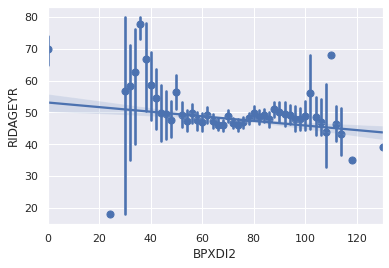

In [14]:
ax = sns.regplot(x = 'BPXDI2',
                 y = 'RIDAGEYR',
                 x_estimator = np.mean,
                 data = df)

## UNA variables 

In [18]:
model = sm.OLS.from_formula('BPXDI2~RIDAGEYR',data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXDI2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.96
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           0.000188
Time:                        12:37:00   Log-Likelihood:                -21761.
No. Observations:                5478   AIC:                         4.353e+04
Df Residuals:                    5476   BIC:                         4.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0518      0.486    146.166      0.000      70.099      72.005
RIDAGEYR      -0.0353      0.009     -3.737      0.000      -0.054      -0.017
==============================================================================
Omnibus:                      851.185   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4069.717
Skew:                          -0.672   Prob(JB):                         0.00
Kurtosis:                       7.003   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## GRAFICA RESIDUAL PUNTOS TIENEN QUE ESTAR CERCA DE LINEA DE REGRESION 

In [21]:
x = result.fittedvalues
y = result.resid

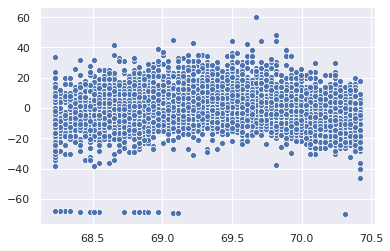

In [24]:
fig = sns.scatterplot( x = x,
                       y = y,
                     )